In [5]:
import pandas as pd
google_data = pd.read_csv("../GOOGL_stock_data.csv", parse_dates=["Date"])
meta_data = pd.read_csv("../META_stock_data.csv", parse_dates=["Date"])


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example for Google stock
# Create lag features
google_data["Lag_1"] = google_data["Close"].shift(1)
google_data["Lag_2"] = google_data["Close"].shift(2)
google_data["50_MA"] = google_data["Close"].rolling(window=50).mean()
google_data["200_MA"] = google_data["Close"].rolling(window=200).mean()

# Drop missing values created by lag or moving averages
google_data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = google_data[["Lag_1", "Lag_2", "50_MA", "200_MA"]]
y = google_data["Close"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R2 Score: {r2_lr}")

Linear Regression Metrics:
Mean Squared Error: 6.1939341832110495
Mean Absolute Error: 1.8014500183846516
R2 Score: 0.9917461375534582


In [8]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_lr
})

print(comparison.head())

       Actual   Predicted
0  113.263000  108.370195
1  114.571999  112.517745
2  118.782997  113.985362
3  119.353500  117.937409
4  115.676498  118.712223


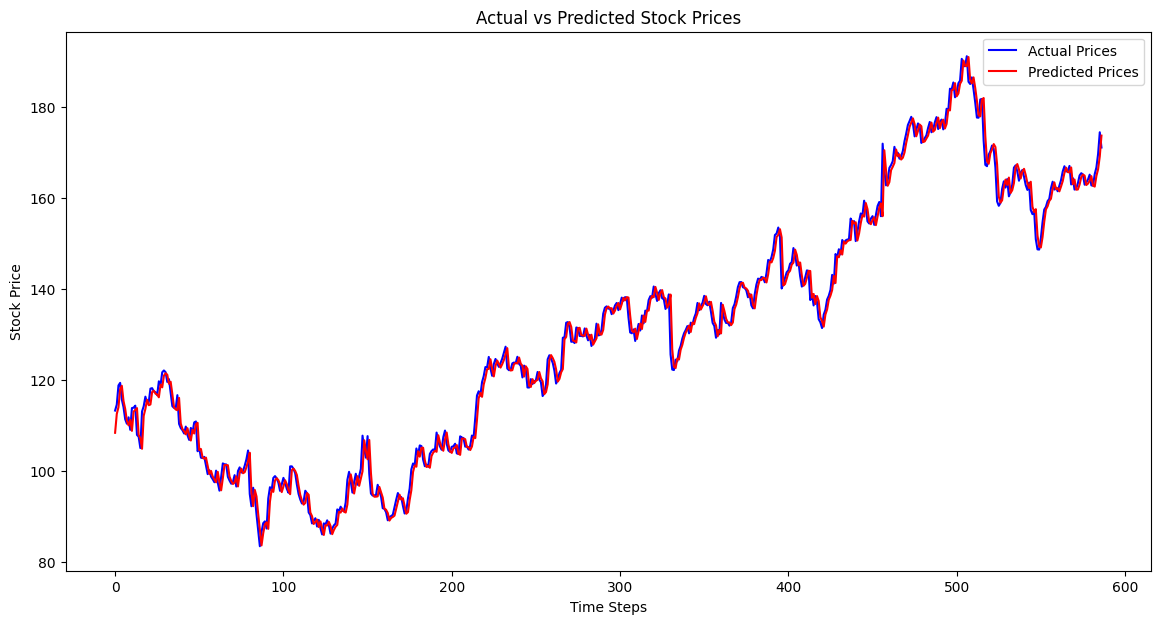

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred_lr, label="Predicted Prices", color="red")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()